## Checking Aeff implementation

In [15]:
import numpy as np
from matplotlib import pyplot as plt
from Precomputation import ExposureIntegral
from detector_model import NorthernTracksEffectiveArea
from astromodels.functions.functions import Powerlaw
from source.source import *

In [10]:
# Check F * eps for a single source at the horizon (dec = 0) with this flux model
flux = lambda energy: 1E-12* 1/(1E-4) * (energy/1E3)**-2 * 1E-3 # GeV^-1 m^-2 s^-1

$$
\phi = 10^{-12} \frac{10^{-3}}{10^{-4}} \Bigg( \frac{E}{10^3} \Bigg)^{-2} \ \mathrm{GeV}^{-1} \mathrm{m}^{-2} \mathrm{s}^{-1}
$$

In [42]:
scaled_flux = 1e-12 * (1e-3/1e-4) * 1e6 * (1/103)**2 # GeV^-1 m^-2 s^-1
scaled_flux = scaled_flux * 3.154e7 # GeV^-1 m^-2 yr^-1

In [43]:
source = PointSource('point', ra=0.0, dec=0.0, redshift=0.0, unit_vector = [1, 0, 0], spectral_shape=Powerlaw())
source_list = ManualSourceList([source])

In [44]:
time = 10 # years
Emin = 103 # GeV

exposure_integral = ExposureIntegral(source_list, NorthernTracksEffectiveArea, 
                                     time, Emin)
exposure_integral()

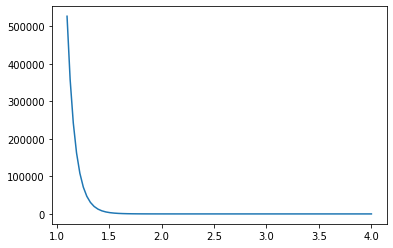

In [45]:
fig, ax = plt.subplots()
for _ in exposure_integral.integral_grid:
    ax.plot(exposure_integral.alpha_grid, _)

In [48]:
eps = np.interp(2.0, exposure_integral.alpha_grid, exposure_integral.integral_grid[0])

In [49]:
alpha = 2
scaled_flux * eps * 10

8.71852730577121